## CS/INFO 5304 Assignment 1: Data Preparation <br />

In [2]:
def format_plot(ax, xlab = "", ylab = "", title = "", legend = False, xticks = None, yticks = None,
                xticks_labels = None, xticks_rotation = "horizontal"):
    ax.set_xlabel(xlab,  fontsize = 14)
    ax.set_ylabel(ylab,  fontsize = 14)
    ax.set_title(title,  fontsize = 16, fontweight = "bold")
    if legend:
        ax.legend(fontsize = 14)
    
    if xticks is not None:
        ax.set_xticks(xticks)
    if xticks_labels is not None:
        ax.set_xticklabels(xticks_labels, rotation = xticks_rotation, fontsize=8)
    
    if yticks is not None:
        ax.set_yticks(yticks)

def custom_box_plot(ax, data):
    c, fc = "navy", "lightblue" 
    bp0 = ax.boxplot(data, widths = 1.5, vert = False, patch_artist = True, 
                     capprops = dict(color = c, linewidth = 6), 
                     whiskerprops = dict(color = c, linewidth = 4),
                     medianprops = dict(color = c, linewidth = 3), 
                     flierprops = dict(color = c, markersize = 15,
                     markerfacecolor = fc, markeredgewidth = 3, markeredgecolor = c))

    for box in bp0['boxes']:
        box.set(color = c, linewidth = 4)
        box.set(facecolor = fc)
        box.set()    

## Question 4: Data Visualization (10 points)

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

weather_df = pd.read_csv("data/p4/weather.csv")

weather_df["Ktemp"] = weather_df["Ktemp"].apply(lambda x: (x - 273.15) * (9 / 5) + 32)
weather_df = weather_df.rename(columns={'Ktemp': 'Ftemp'})

display(weather_df)

,time,longitude,latitude,Ftemp
0,1950-01-01 9:00:00,286,40.75,34.245212
1,1950-01-02 9:00:00,286,40.75,39.066674
2,1950-01-03 9:00:00,286,40.75,45.771620
3,1950-01-04 9:00:00,286,40.75,57.182180
4,1950-01-05 9:00:00,286,40.75,54.504716
...,...,...,...,...
26293,2021-12-27 9:00:00,286,40.75,38.058440
26294,2021-12-28 9:00:00,286,40.75,38.909300
26295,2021-12-29 9:00:00,286,40.75,42.241550
26296,2021-12-30 9:00:00,286,40.75,44.140640


### Part A) 
For every month of the year, plot the average temperature (in Fahrenheit) using a scatter plot or line plot. Your visual should be configurable so that a user can easily look at a specific year’s weather curve (use a sliding scale filter). (6 points)

####  Dynamic Visualization: 

https://public.tableau.com/app/profile/fabio.deo/viz/p4_16797834465000/Dashboard1

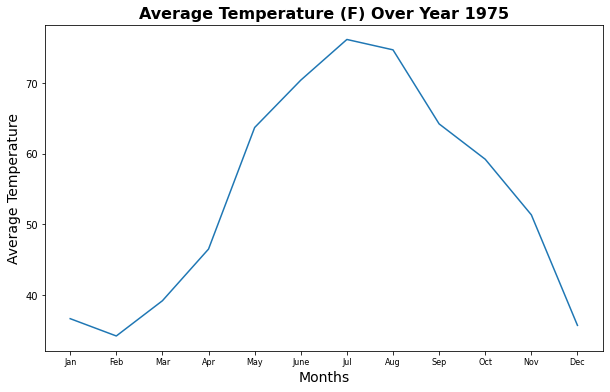

In [6]:
# Non Interactive Python Version
year = 1975
months = ["Jan", "Feb", "Mar", "Apr", "May", "June", 
          "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
year_weather_df = weather_df[weather_df["time"].apply(lambda x: x[0:4]) == str(year)].copy()
year_weather_df["year_month"] = weather_df["time"].apply(lambda x: x[0:7]) 

monthly_grouped_df = year_weather_df.groupby(by = ["year_month"])[["Ftemp"]].mean()

fig, ax = plt.subplots(1, 1, figsize = (10, 6))

ax.plot(monthly_grouped_df.index, monthly_grouped_df["Ftemp"])

format_plot(ax, xlab = "Months", ylab = "Average Temperature", 
            xticks = range(len(months)), xticks_labels = months, 
            title = "Average Temperature (F) Over Year " + str(year))

### Part B) 
Based on all of the data, when is the first year where the year's average temperature passes 55 degrees (when will Cornell Tech finally be warm?) (2 points)


In [5]:
weather_df["year"] = weather_df["time"].apply(lambda x: x[0:4]) 
year_grouped_df = weather_df.groupby(by = ["year"])[["Ftemp"]].mean()

warm_years = year_grouped_df[year_grouped_df["Ftemp"] > 55.0]
print("The first warm year (avg temperature > 55.0 yearly) was: ", 
      warm_years.index.values[0])

The first warm year (avg temperature > 55.0 yearly) was:  1953


#### Part C) 
Create a new sheet where you do something creative through data visualization. Express something about the temperature over time(e.g. Look in the cycle of temperature over seasons, etc ) using this dataset, or add a new dataset(any available dataset online is fine) and find some correlation with the temperature(e.g. Number of some kind of fish in the ocean, etc, does the number of it go up and down following the temperature trend? Etc.). (2 points) 

####  Dynamic Visualization: 

https://public.tableau.com/app/profile/fabio.deo/viz/p4_16797834465000/Dashboard1